# I&R with multiphase analysis
Let's say that you would like to know the largest transiting planet that you could be able to detect
by using `transitleastsquares`. This is a typical use case where most of the scientists are injecting
a transit model (given a a planetary radius, orbital period, epoch and duration) into a light curve
and perform a simple search with `transitleastsquares`. Even though this is a fair approach, it might
return inconsistent results due to some reasons, where the main one is the bias introduced by the
chosen epoch. The light curves usually show non-uniform noise with time and that makes some transits to
be recoverable when they happen at certain epochs and unrecoverable at some other epochs.

We are particularly interested in the case of the TOI-2257, where one transiting planet has already been
found with a period of 35.19 days, an epoch of 1691.28 and a duration of 1.9 hours. As the TOI-2257.01
planet is already known, we want to assess whether some other planets might be detectable in inner orbits.
Let's say we will study the detectability from orbits of 1 day to 30 days. Given that premise and the
fact that we are not interested into the already known planet, we will use a properties file to
launch MATRIX like [this](https://github.com/PlanetHunters/blob/master/examples/TOI-2257/matrix_properties.yaml):

Look at it carefully. We are selecting the target that we want to process, with a short cadence of 2 minutes:
```
TARGET: "TIC 198485881"
SECTORS: all
EXPOSURE_TIME: 120
```

In addition, we select the period grid by defining minimum and maximum values and the number of points.
We want a grid from 1 day to 30 days with one point per day:
```
MIN_PERIOD: 1
MAX_PERIOD: 30
STEPS_PERIOD: 29
```

Same for the radius grid, we want a grid from 0.5 Earth radius to 3.5:
```
MIN_RADIUS: 0.5
MAX_RADIUS: 3.5
STEPS_RADIUS: 15
```

And then, define the multi-phase scenario to 4:
```
PHASES: 4
```

In addition, we select a window of 0.5 days to remove trends in the light curve:
```
DETREND_WS: 0.5
```

You can also define the number of CPU cores to be used. We selected 40:
```
CPUS: 40
```

Finally, We will be masking the known transit of TOI-2257.01 with:
```
KNOWN_TRANSITS:
  - P: 35.1885
    T0: 1691.275171
    D: 1.9
```

As this calculation can't be executed in a notebook (it would last several days), we show the command
line that would need to be executed to run the analysis:
```
python3.8 -m tkmatrix --properties matrix_properties.yaml
```

As soon as the process finished, you would find a folder named `TIC198485881_ir` containing two files:
* a_tls_report.csv: The `csv` found/not found results for each period, radius and epoch.
* inj-rec.pdf: The automatically generated plot from the `csv` results. It is used to give a prior idea of the results, but
you would usually want to generate your own.

Lets show the first lines of the output of the `csv` report from our analysis:

In [6]:
import os
your_execution_dir = os.getcwd()

with open(your_execution_dir + '/TIC198485881_ir/a_tls_report.csv') as myfile:
    for x in range(5):
        print(next(myfile))

period,radius,epoch,found,snr,sde,run

1.0,0.5,1683.4349482935227,False,2.09225409709732,7.936248749896058,1

1.0,0.7,1683.4349482935227,False,2.103809977201967,8.026198189698592,1

1.0,0.9,1683.4349482935227,False,3.110491561648527,9.21988157347108,1

1.0,1.1,1683.4349482935227,False,4.516385074706731,19.663443068932118,1



Well it contains the period, radius and epoch and the found flag together with the Signal Noise Ratio (SNR)
and Signal Detection Efficiency (SDE) values of the signal and the run where the signal was found.

To finish this notebook, just let's visualize the automatic plot generated by `MATRIX`:

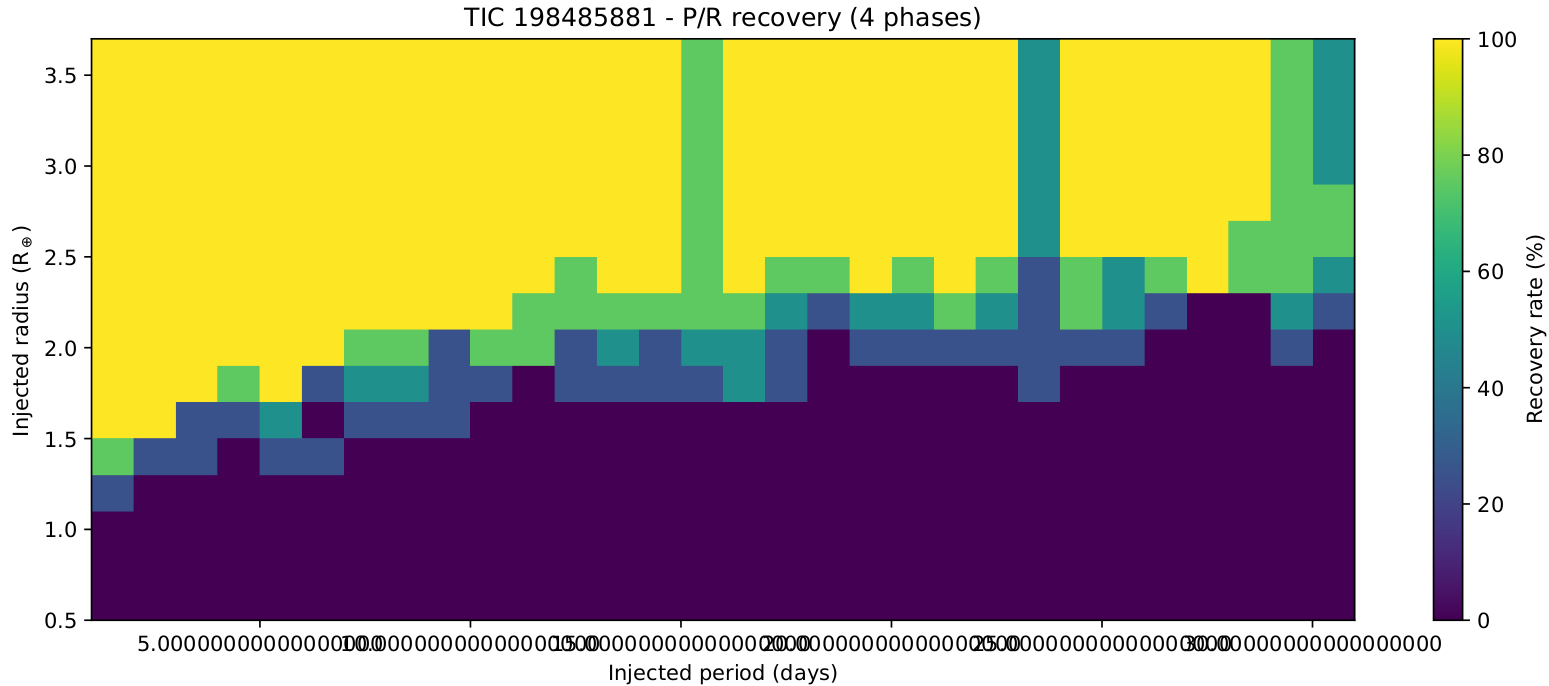

In [7]:
file_image = your_execution_dir + '/TIC198485881_ir/inj-rec.png'
from IPython.display import Image
Image(filename=file_image)